## Clustering - ALLLife bank

![Customers](https://cvhub4africa.com/wp-content/uploads/2018/10/Customer-Acquisition-Strategy.gif "Customers")

### Goal
<font color=blue> <font size="3">To identify  different  segments  in  the  existing  customer  based  on  their spending patterns as well as past interaction with the bank.  </font>

In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/users/subrotosingh/AIML/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 2. Meet and Greet the Data

In [87]:
#Read the Dataset

df1=pd.read_excel('/users/subrotosingh/AIML/Credit Card Customer Data.xlsx')
df2=df1
df3=df1
df4=df3

In [5]:
df1.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


Observations:

1. It shows that there are seven independent variables ( Sl_No	Customer Key	Avg_Credit_Limit	Total_Credit_Cards	Total_visits_bank	Total_visits_online	Total_calls_made) 
2. All the records are numeric.
3. SI_No and Customer Key can be dropped as this doesnt add any value to our analysis

In [7]:
#Check the last few records 

df1.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [8]:
import pandas_profiling
df1.profile_report()

In [9]:
#Info of the dataset
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


It gives the details about the number of rows (660), number of columns (7), data types information are all integers. Memory usage is 36.2 KB. Also,there are no null values in the data.

In [10]:
#Check for the missing values 
df1.isnull().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [11]:
#Dropping SI No and Customer Key as its not adding value to our analysis
df1 = df1.drop(['Sl_No','Customer_Key'], axis=1)



In [12]:
df1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [13]:
df1.shape
#It gives the details of the number of rows and columns present in the dataset.

(660, 5)

In [14]:
# Five point summary
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


We can see the Avg_Credit_Limit is left skewed. Will start EDA to explore more on this.

# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis  

### Avg_Credit_Limit

In [15]:
print('Range of values: ', df1['Avg_Credit_Limit'].max()-df1['Avg_Credit_Limit'].min())

Range of values:  197000


In [16]:
#Central values 
print('Minimum Credit Limit: ', df1['Avg_Credit_Limit'].min())
print('Maximum Credit Limit: ',df1['Avg_Credit_Limit'].max())
print('Mean value: ', df1['Avg_Credit_Limit'].mean())
print('Median value: ',df1['Avg_Credit_Limit'].median())
print('Standard deviation: ', df1['Avg_Credit_Limit'].std())

Minimum Credit Limit:  3000
Maximum Credit Limit:  200000
Mean value:  34574.242424242424
Median value:  18000.0
Standard deviation:  37625.48780422166


In [17]:
#Quartiles

Q1=df1['Avg_Credit_Limit'].quantile(q=0.25)
Q3=df1['Avg_Credit_Limit'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df1['Avg_Credit_Limit']))

1st Quartile (Q1) is:  10000.0
3st Quartile (Q3) is:  48000.0
Interquartile range (IQR) is  38000.0


In [18]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -47000.0
Upper outliers in cement:  105000.0


In [19]:
print('Number of outliers in Avg_Credit_Limit upper : ', df1[df1['Avg_Credit_Limit']>105000.0]['Avg_Credit_Limit'].count())
print('Number of outliers in Avg_Credit_Limit lower : ', df1[df1['Avg_Credit_Limit']<-47000.0]['Avg_Credit_Limit'].count())
print('% of Outlier in Avg_Credit_Limit upper: ',round(df1[df1['Avg_Credit_Limit']>105000.0]['Avg_Credit_Limit'].count()*100/len(df1)), '%')
print('% of Outlier in Avg_Credit_Limit lower: ',round(df1[df1['Avg_Credit_Limit']<-47000.0]['Avg_Credit_Limit'].count()*100/len(df1)), '%')

Number of outliers in Avg_Credit_Limit upper :  39
Number of outliers in Avg_Credit_Limit lower :  0
% of Outlier in Avg_Credit_Limit upper:  6.0 %
% of Outlier in Avg_Credit_Limit lower:  0.0 %


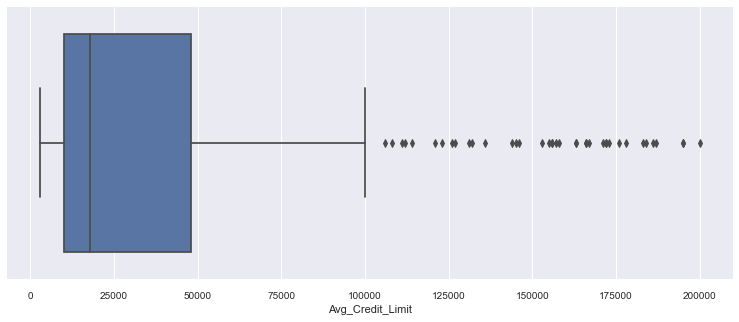

In [20]:
fig, ax1=plt.subplots(1,1,figsize=(13,5))

#boxplot
sns.boxplot(x='Avg_Credit_Limit',data=df1,orient='h',ax=ax1)
#ax1.set_ylabel('Total_calls_made', fontsize=15)
#ax1.set_title('Distribution of Total_calls_made', fontsize=15)
#ax1.tick_params(labelsize=15)

### Total_Credit_Cards

In [21]:
print('Range of values: ', df1['Total_Credit_Cards'].max()-df1['Total_Credit_Cards'].min())

Range of values:  9


In [22]:
#Central values 
print('Minimum No Of Credit Cards: ', df1['Total_Credit_Cards'].min())
print('Maximum No Of Credit Cards: ',df1['Total_Credit_Cards'].max())
print('Mean value: ', df1['Total_Credit_Cards'].mean())
print('Median value: ',df1['Total_Credit_Cards'].median())
print('Standard deviation: ', df1['Total_Credit_Cards'].std())

Minimum No Of Credit Cards:  1
Maximum No Of Credit Cards:  10
Mean value:  4.706060606060606
Median value:  5.0
Standard deviation:  2.167834859511195


In [23]:
#Quartiles

Q1=df1['Total_Credit_Cards'].quantile(q=0.25)
Q3=df1['Total_Credit_Cards'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df1['Total_Credit_Cards']))

1st Quartile (Q1) is:  3.0
3st Quartile (Q3) is:  6.0
Interquartile range (IQR) is  3.0


In [24]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Total_Credit_Cards: ', L_outliers)
print('Upper outliers in Total_Credit_Cards: ', U_outliers)

Lower outliers in Total_Credit_Cards:  -1.5
Upper outliers in Total_Credit_Cards:  10.5


In [25]:
print('Number of outliers in Total_Credit_Cards upper : ', df1[df1['Total_Credit_Cards']>10.5]['Total_Credit_Cards'].count())
print('Number of outliers in Total_Credit_Cards lower : ', df1[df1['Total_Credit_Cards']<-1.5]['Total_Credit_Cards'].count())
print('% of Outlier in Total_Credit_Cards upper: ',round(df1[df1['Total_Credit_Cards']>10.5]['Total_Credit_Cards'].count()*100/len(df1)), '%')
print('% of Outlier in Total_Credit_Cards lower: ',round(df1[df1['Total_Credit_Cards']<-1.5]['Total_Credit_Cards'].count()*100/len(df1)), '%')

Number of outliers in Total_Credit_Cards upper :  0
Number of outliers in Total_Credit_Cards lower :  0
% of Outlier in Total_Credit_Cards upper:  0.0 %
% of Outlier in Total_Credit_Cards lower:  0.0 %


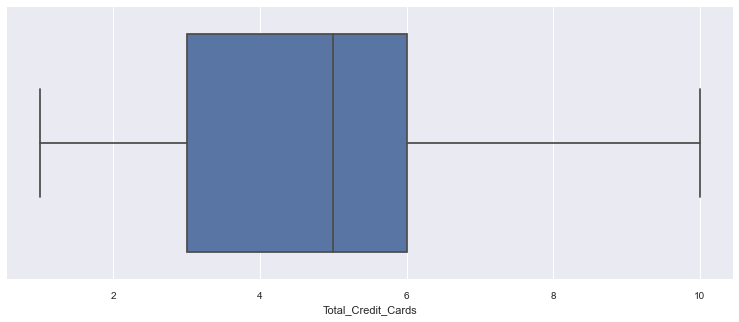

In [26]:
fig, ax1=plt.subplots(1,1,figsize=(13,5))

#boxplot
sns.boxplot(x='Total_Credit_Cards',data=df1,orient='h',ax=ax1)
#ax1.set_ylabel('Total_calls_made', fontsize=15)
#ax1.set_title('Distribution of Total_calls_made', fontsize=15)
#ax1.tick_params(labelsize=15)

### Total_visits_bank

In [27]:
print('Range of values: ', df1['Total_visits_bank'].max()-df1['Total_visits_bank'].min())

Range of values:  5


In [28]:
#Central values 
print('Minimum No Of Bank Visits: ', df1['Total_visits_bank'].min())
print('Maximum No Of Bank Visits: ',df1['Total_visits_bank'].max())
print('Mean value: ', df1['Total_visits_bank'].mean())
print('Median value: ',df1['Total_visits_bank'].median())
print('Standard deviation: ', df1['Total_visits_bank'].std())

Minimum No Of Bank Visits:  0
Maximum No Of Bank Visits:  5
Mean value:  2.403030303030303
Median value:  2.0
Standard deviation:  1.631812875791615


In [29]:
#Quartiles

Q1=df1['Total_visits_bank'].quantile(q=0.25)
Q3=df1['Total_visits_bank'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df1['Total_visits_bank']))

1st Quartile (Q1) is:  1.0
3st Quartile (Q3) is:  4.0
Interquartile range (IQR) is  3.0


In [30]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Total_Credit_Cards: ', L_outliers)
print('Upper outliers in Total_Credit_Cards: ', U_outliers)

Lower outliers in Total_Credit_Cards:  -3.5
Upper outliers in Total_Credit_Cards:  8.5


In [31]:
print('Number of outliers in Total_visits_bank upper : ', df1[df1['Total_visits_bank']>8.5]['Total_visits_bank'].count())
print('Number of outliers in Total_visits_bank lower : ', df1[df1['Total_visits_bank']<-3.5]['Total_visits_bank'].count())
print('% of Outlier in Total_visits_bank upper: ',round(df1[df1['Total_visits_bank']>8.5]['Total_visits_bank'].count()*100/len(df1)), '%')
print('% of Outlier in Total_visits_bank lower: ',round(df1[df1['Total_visits_bank']<-3.5]['Total_visits_bank'].count()*100/len(df1)), '%')

Number of outliers in Total_visits_bank upper :  0
Number of outliers in Total_visits_bank lower :  0
% of Outlier in Total_visits_bank upper:  0.0 %
% of Outlier in Total_visits_bank lower:  0.0 %


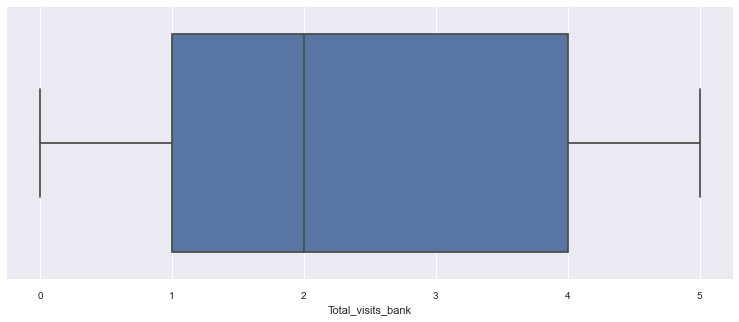

In [32]:
fig, ax1=plt.subplots(1,1,figsize=(13,5))

#boxplot
sns.boxplot(x='Total_visits_bank',data=df1,orient='h',ax=ax1)
#ax1.set_ylabel('Total_calls_made', fontsize=15)
#ax1.set_title('Distribution of Total_calls_made', fontsize=15)
#ax1.tick_params(labelsize=15)

### Total_visits_online

In [33]:
print('Range of values: ', df1['Total_visits_online'].max()-df1['Total_visits_online'].min())

Range of values:  15


In [34]:
#Central values 
print('Minimum No Of Online Visits : ', df1['Total_visits_online'].min())
print('Maximum No Of Bank Visits: ',df1['Total_visits_online'].max())
print('Mean value: ', df1['Total_visits_online'].mean())
print('Median value: ',df1['Total_visits_online'].median())
print('Standard deviation: ', df1['Total_visits_online'].std())

Minimum No Of Online Visits :  0
Maximum No Of Bank Visits:  15
Mean value:  2.606060606060606
Median value:  2.0
Standard deviation:  2.9357241204935423


In [35]:
#Quartiles

Q1=df1['Total_visits_online'].quantile(q=0.25)
Q3=df1['Total_visits_online'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df1['Total_visits_online']))


1st Quartile (Q1) is:  1.0
3st Quartile (Q3) is:  4.0
Interquartile range (IQR) is  3.0


In [36]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Total_visits_online: ', L_outliers)
print('Upper outliers in Total_visits_online: ', U_outliers)

Lower outliers in Total_visits_online:  -3.5
Upper outliers in Total_visits_online:  8.5


In [37]:

print('Number of outliers in Total_visits_online upper : ', df1[df1['Total_visits_online']>8.5]['Total_visits_online'].count())
print('Number of outliers in Total_visits_online lower : ', df1[df1['Total_visits_online']<-3.5]['Total_visits_online'].count())
print('% of Outlier in Total_visits_online upper: ',round(df1[df1['Total_visits_online']>8.5]['Total_visits_online'].count()*100/len(df1)), '%')
print('% of Outlier in Total_visits_online lower: ',round(df1[df1['Total_visits_online']<-3.5]['Total_visits_online'].count()*100/len(df1)), '%')

Number of outliers in Total_visits_online upper :  37
Number of outliers in Total_visits_online lower :  0
% of Outlier in Total_visits_online upper:  6.0 %
% of Outlier in Total_visits_online lower:  0.0 %


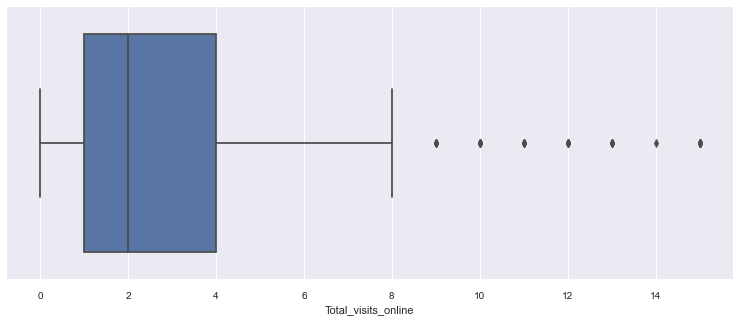

In [38]:
fig, ax1=plt.subplots(1,1,figsize=(13,5))

#boxplot
sns.boxplot(x='Total_visits_online',data=df1,orient='h',ax=ax1)
#ax1.set_ylabel('Total_calls_made', fontsize=15)
#ax1.set_title('Distribution of Total_calls_made', fontsize=15)
#ax1.tick_params(labelsize=15)

### Total_calls_made

In [39]:
print('Range of values: ', df1['Total_calls_made'].max()-df1['Total_calls_made'].min())

Range of values:  10


In [40]:
#Central values 
print('Minimum No Of Total_calls_made : ', df1['Total_calls_made'].min())
print('Maximum No Of Total_calls_made: ',df1['Total_calls_made'].max())
print('Mean value: ', df1['Total_calls_made'].mean())
print('Median value: ',df1['Total_calls_made'].median())
print('Standard deviation: ', df1['Total_calls_made'].std())

Minimum No Of Total_calls_made :  0
Maximum No Of Total_calls_made:  10
Mean value:  3.5833333333333335
Median value:  3.0
Standard deviation:  2.8653168176227113


In [41]:
#Quartiles

Q1=df1['Total_calls_made'].quantile(q=0.25)
Q3=df1['Total_calls_made'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df1['Total_calls_made']))

1st Quartile (Q1) is:  1.0
3st Quartile (Q3) is:  5.0
Interquartile range (IQR) is  4.0


In [42]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Total_calls_made: ', L_outliers)
print('Upper outliers in Total_calls_made: ', U_outliers)

Lower outliers in Total_calls_made:  -5.0
Upper outliers in Total_calls_made:  11.0


In [43]:

print('Number of outliers in Total_calls_made upper : ', df1[df1['Total_calls_made']>11.0]['Total_calls_made'].count())
print('Number of outliers in Total_calls_made lower : ', df1[df1['Total_calls_made']<-5.0]['Total_calls_made'].count())
print('% of Outlier in Total_calls_made upper: ',round(df1[df1['Total_calls_made']>11.0]['Total_calls_made'].count()*100/len(df1)), '%')
print('% of Outlier in Total_calls_made lower: ',round(df1[df1['Total_calls_made']<-5.0]['Total_calls_made'].count()*100/len(df1)), '%')

Number of outliers in Total_calls_made upper :  0
Number of outliers in Total_calls_made lower :  0
% of Outlier in Total_calls_made upper:  0.0 %
% of Outlier in Total_calls_made lower:  0.0 %


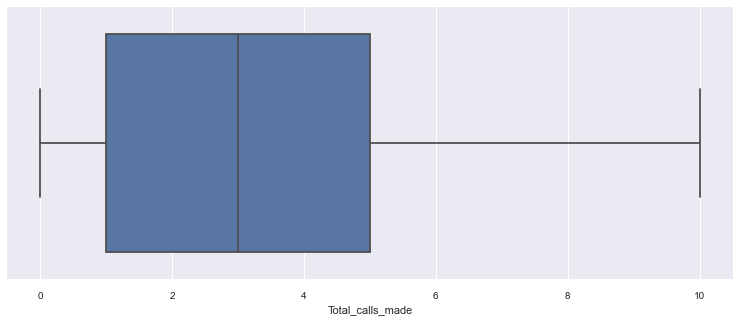

In [44]:
fig, ax1=plt.subplots(1,1,figsize=(13,5))

#boxplot
sns.boxplot(x='Total_calls_made',data=df1,orient='h',ax=ax1)
#ax1.set_ylabel('Total_calls_made', fontsize=15)
#ax1.set_title('Distribution of Total_calls_made', fontsize=15)
#ax1.tick_params(labelsize=15)

### From the above boxplots we can see there are outliers in Avg_Credit_Limit and Total_visits_online, hence will treat the outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda9facff10>,
      dtype=object)

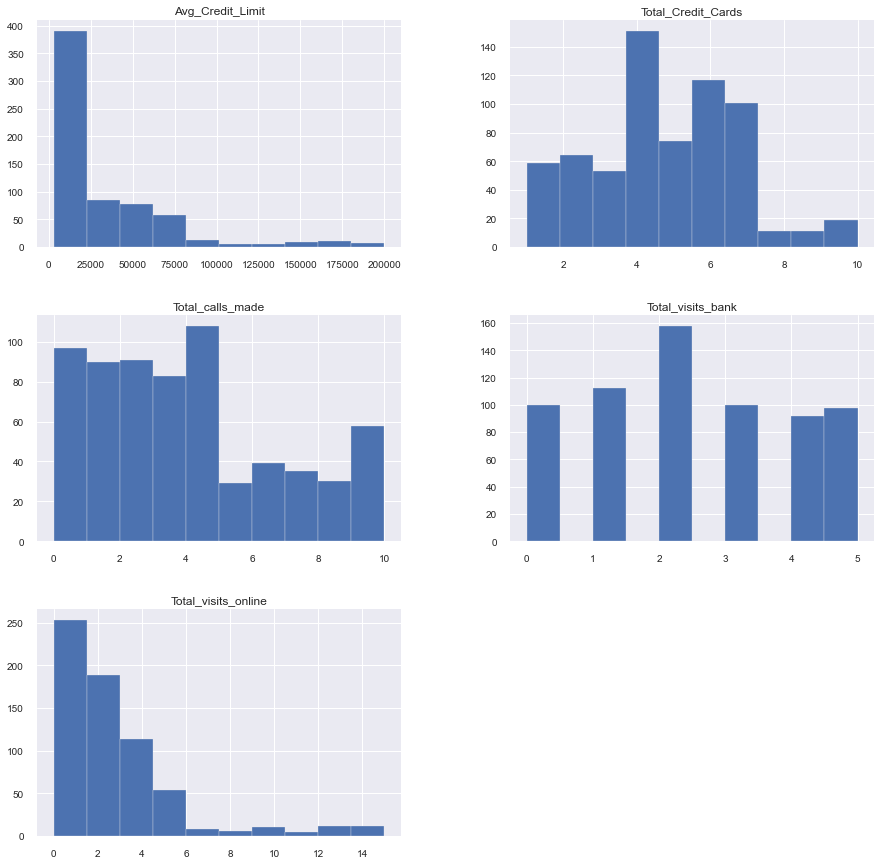

In [45]:
# Histogram
df1.hist(figsize=(15,15))

### From the above we can infer

- Close to 390 customers have avg credit limit between 0 to 25000
- 140 customers have 4 credit cards
- 150 customers have made phone calls between 4 to 5 times
- Close to 150 people have visit banks twice
- Maximum number of online visits have been 14 times

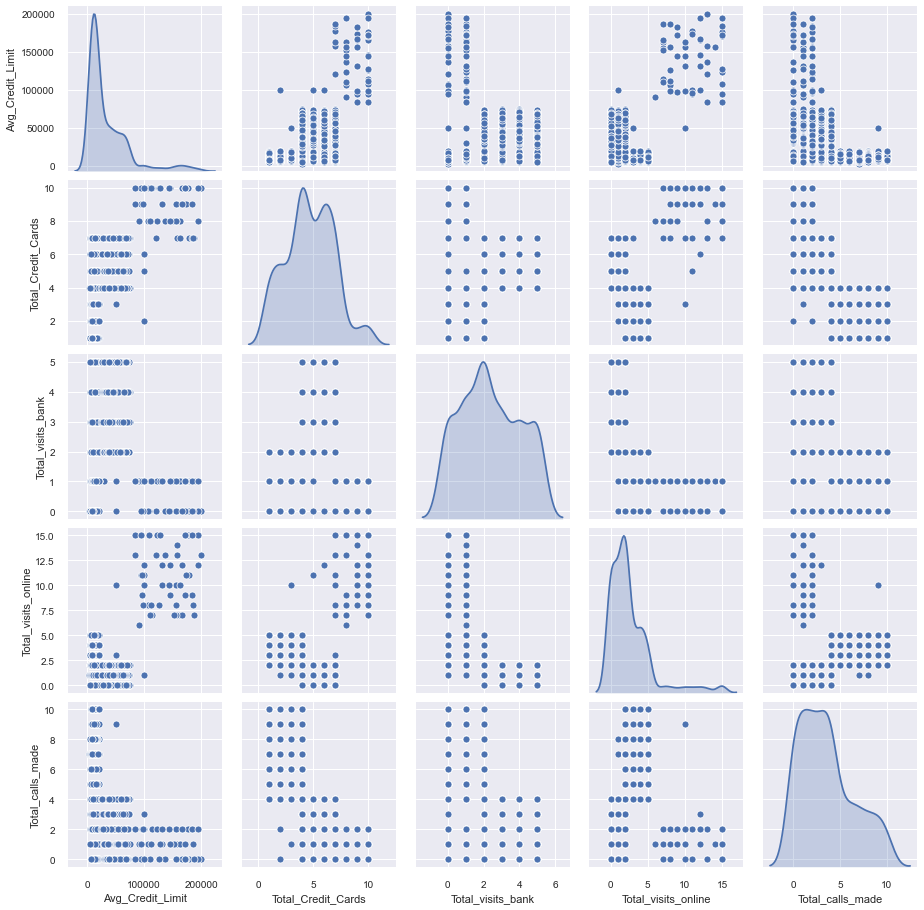

In [46]:
## pairplot- plot density curve instead of histogram in diagonal

sns.pairplot(df1, diag_kind='kde')

In [47]:
# corrlation matrix 
cor=df1.corr()
cor

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


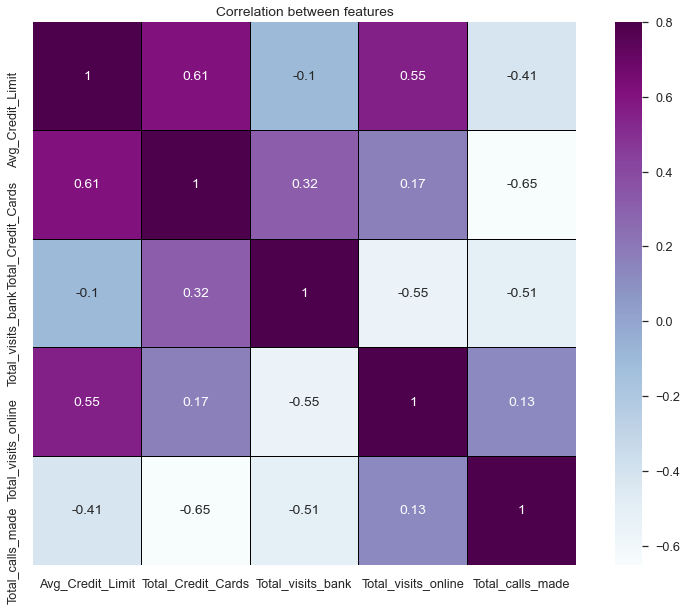

In [48]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

We can see that avg_credit_limit and total credit cards have a small co-relation among them

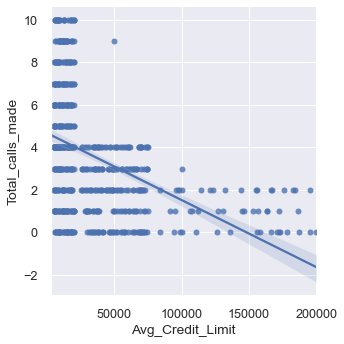

In [49]:
# water vs cement
sns.lmplot(x="Avg_Credit_Limit",y="Total_calls_made",data=df1)
plt.show()

## 3.2 Handling missing values and Outliers

In [50]:
#Check for the missing values 
df1.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

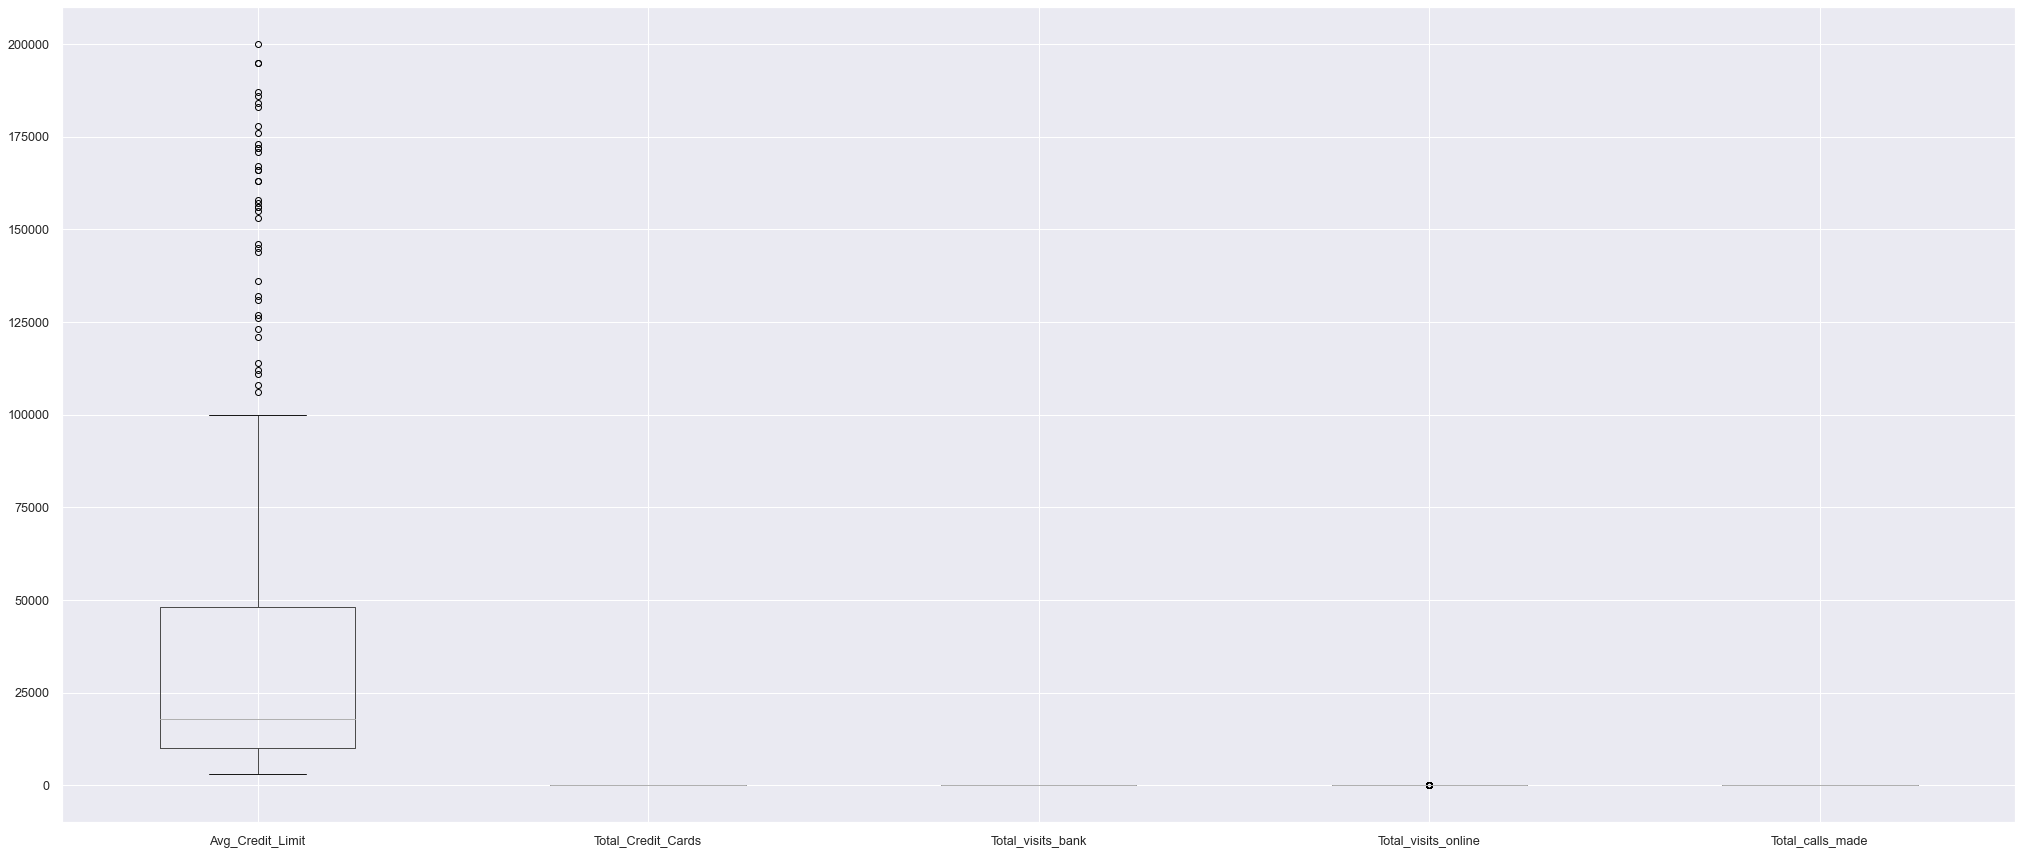

In [51]:
#Checking for outliers
df1=df1.copy()
df1.boxplot(figsize=(35,15))

In [52]:
#Number of outliers present in the dataset
print('Number of outliers in Avg_Credit_Limit: ',df1[((df1.Avg_Credit_Limit - df1.Avg_Credit_Limit.mean()) / df1.Avg_Credit_Limit.std()).abs() >3]['Avg_Credit_Limit'].count())
print('Number of outliers in Total_visits_online: ',df1[((df1.Total_visits_online - df1.Total_visits_online.mean()) / df1.Total_visits_online.std()).abs() >3]['Total_visits_online'].count())

Number of outliers in Avg_Credit_Limit:  24
Number of outliers in Total_visits_online:  22


1. Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
2. We can see that Avg_Credit_Limit & Total_visits_online  contain outliers.

In [53]:
print('Records containing outliers in Avg_Credit_Limit: \n',df1[((df1.Avg_Credit_Limit - df1.Avg_Credit_Limit.mean()) / df1.Avg_Credit_Limit.std()).abs() >3]['Avg_Credit_Limit'])


Records containing outliers in Avg_Credit_Limit: 
 612    157000
614    163000
619    158000
621    166000
622    176000
623    166000
624    178000
626    156000
629    155000
630    200000
631    195000
632    187000
633    163000
637    173000
638    153000
639    184000
645    171000
646    186000
647    183000
650    195000
652    156000
654    172000
658    172000
659    167000
Name: Avg_Credit_Limit, dtype: int64


In [54]:
print('Records containing outliers in Total_visits_online: \n',df1[((df1.Total_visits_online - df1.Total_visits_online.mean()) / df1.Total_visits_online.std()).abs() >3]['Total_visits_online'])


Records containing outliers in Total_visits_online: 
 4      12
612    14
617    13
618    13
619    13
620    15
621    12
622    15
627    12
628    15
630    13
631    15
639    15
640    15
644    15
645    15
650    12
651    12
653    15
656    13
658    15
659    12
Name: Total_visits_online, dtype: int64


## 3.3 Handling the outliers

In [55]:


#Replacing the outliers by mean
for col_name in df1.columns[:-1]:
    q1 = df1[col_name].quantile(0.25)
    q3 = df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df1.loc[(df1[col_name] < low) | (df1[col_name] > high), col_name] = df1[col_name].mean()

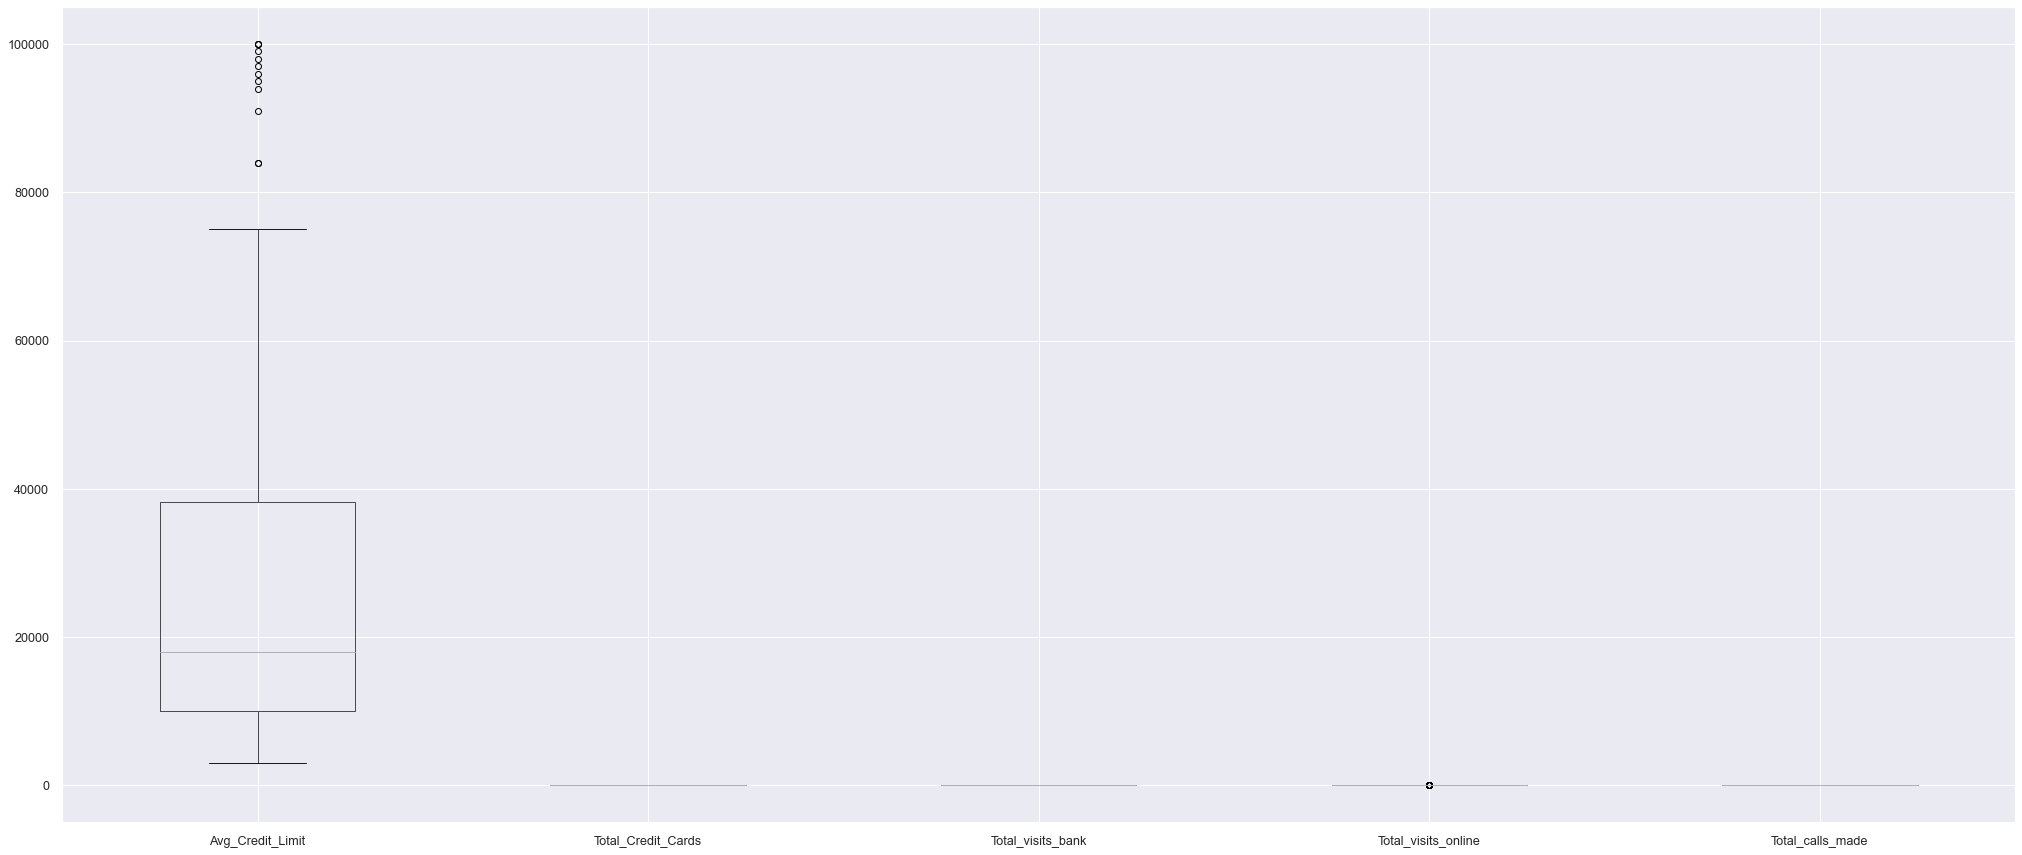

In [56]:
df1.boxplot(figsize=(35,15))

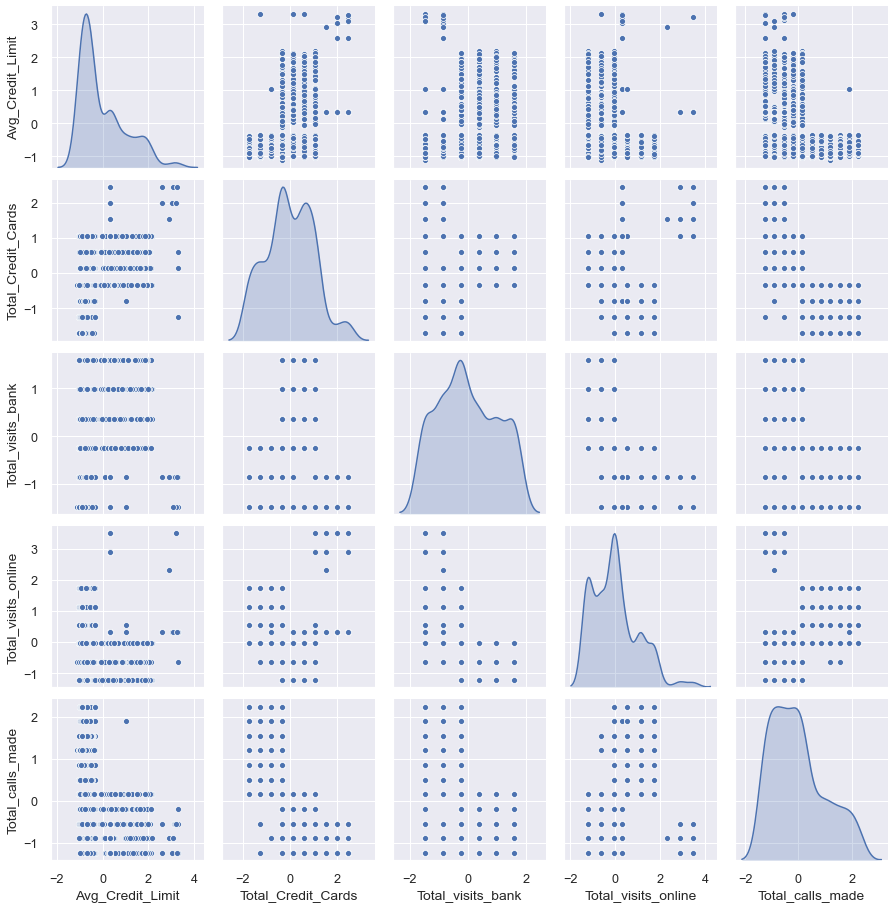

In [57]:
df1Attr=df1.iloc[:,0:]
df1Scaled=df1Attr.apply(zscore)
sns.pairplot(df1Scaled,diag_kind='kde')
#Lets replace each column with mean  = 0 and standard deviation = 1

In [58]:
df1Scaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,3.320055,-1.249225,-0.860451,-0.627632,-1.251537
1,1.030199,-0.787585,-1.473731,0.316813,1.891859
2,1.030199,1.058973,-0.860451,0.548469,0.145528
3,0.114257,0.135694,-0.860451,-0.627632,0.145528
4,3.320055,0.597334,-1.473731,0.316813,-0.203739
...,...,...,...,...,...
655,3.274258,2.443892,-0.860451,0.316813,-1.251537
656,2.587301,2.443892,-0.860451,0.316813,-0.553005
657,0.323744,1.520613,-0.860451,0.316813,-0.902271
658,0.323744,2.443892,-0.860451,0.316813,-1.251537


In [59]:
df1Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,-4.306320e-17,1.000758,-1.122265,-0.801685,-0.435308,0.492083,3.320055
Total_Credit_Cards,660.0,4.306320e-17,1.000758,-1.710864,-0.787585,0.135694,0.597334,2.443892
Total_visits_bank,660.0,-4.306320e-17,1.000758,-1.473731,-0.860451,-0.247170,0.979390,1.592670
Total_visits_online,660.0,-1.291896e-16,1.000758,-1.215682,-0.627632,-0.039581,0.548469,3.488720
Total_calls_made,660.0,-8.612639e-17,1.000758,-1.251537,-0.902271,-0.203739,0.494794,2.241125


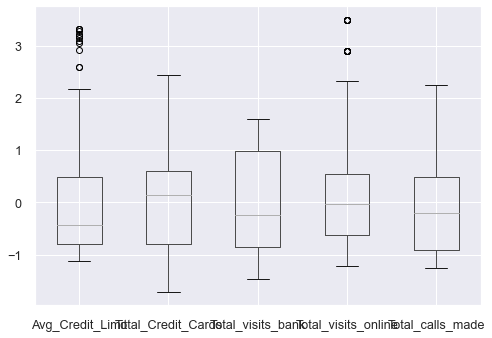

In [60]:
df1Scaled.boxplot()

# 4. Execute K-means clustering use elbow plot and analyse clusters using boxplot

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

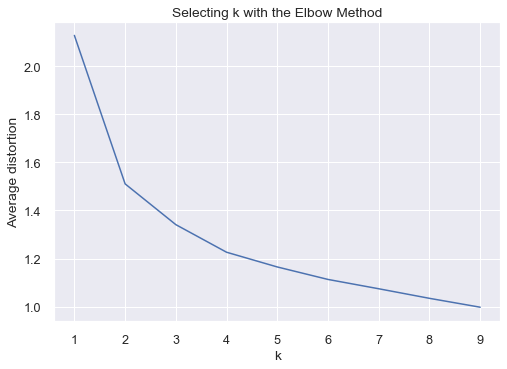

In [61]:
#Finding optimal no. of clusters
#from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df1Scaled)
    prediction=model.predict(df1Scaled)
    meanDistortions.append(sum(np.min(cdist(df1Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df1Scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


As there are two bends, let us look at 2 clusters and 4 clusters

In [62]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(df1Scaled)
prediction=final_model.predict(df1Scaled)

#Append the prediction 
df1Scaled["GROUP"] = prediction
df1["GROUP"] = prediction
print("Groups Assigned : \n")
df1.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000.0,2.0,1.0,1.000000,0,1
1,50000.0,3.0,0.0,2.606061,9,0
2,50000.0,7.0,1.0,3.000000,4,1
3,30000.0,5.0,1.0,1.000000,4,1
4,100000.0,6.0,0.0,2.606061,3,1


###  Analyze the distribution of the data among the two groups (K = 2). One of the most informative visual tool is boxplot.

In [63]:
df1Clust = df1.groupby(['GROUP'])
df1Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12458.950121,2.477876,0.924779,3.586752,6.823009
1,35340.259740,5.866359,3.172811,1.276079,1.896313


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda9d0bbf10>,
      dtype=object)

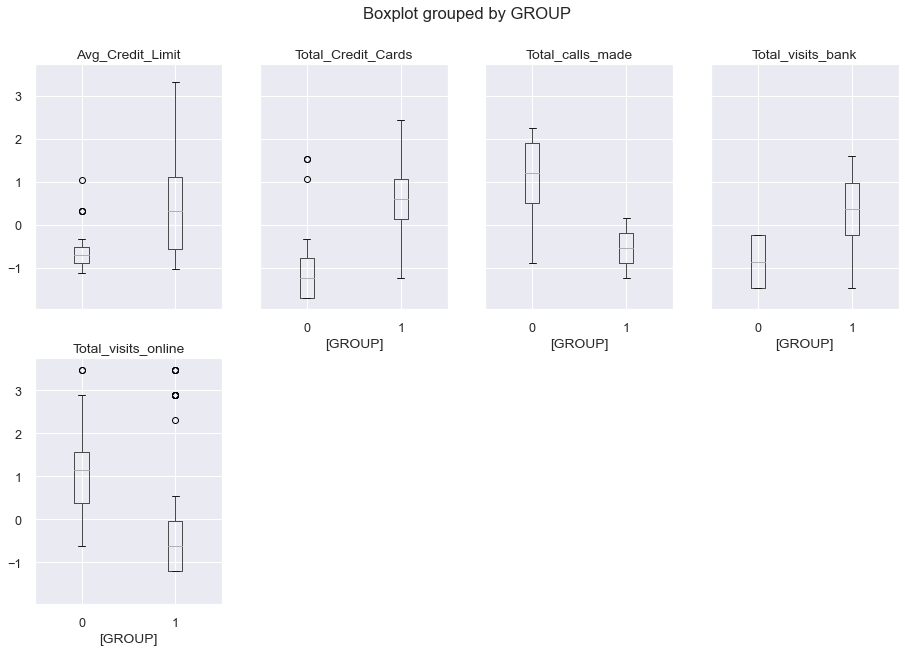

In [64]:
df1Scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [65]:
#Lets try with 4 Clusters K = 4
final_model=KMeans(4)
final_model.fit(df1Scaled)
prediction=final_model.predict(df1Scaled)

#Append the prediction 
df1Scaled["GROUP"] = prediction
df1["GROUP"] = prediction
print("Groups Assigned : \n")
df1.head(10)


Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000.0,2.0,1.0,1.000000,0,1
1,50000.0,3.0,0.0,2.606061,9,0
2,50000.0,7.0,1.0,3.000000,4,3
3,30000.0,5.0,1.0,1.000000,4,2
4,100000.0,6.0,0.0,2.606061,3,1
5,20000.0,3.0,0.0,1.000000,8,0
6,100000.0,5.0,0.0,2.606061,2,1
7,15000.0,3.0,0.0,1.000000,1,2
8,5000.0,2.0,0.0,2.000000,2,0
9,3000.0,4.0,0.0,1.000000,7,0


In [66]:
df1Clust2 = df1.groupby(['GROUP'])
df1Clust2.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12161.434978,2.408072,0.937220,3.531866,6.896861
1,57425.000000,5.531250,3.218750,0.945076,2.062500
2,17618.421053,5.486842,3.644737,1.013158,1.947368
3,45640.723562,8.836735,0.632653,3.971552,1.081633


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaa28d7290>,
      dtype=object)

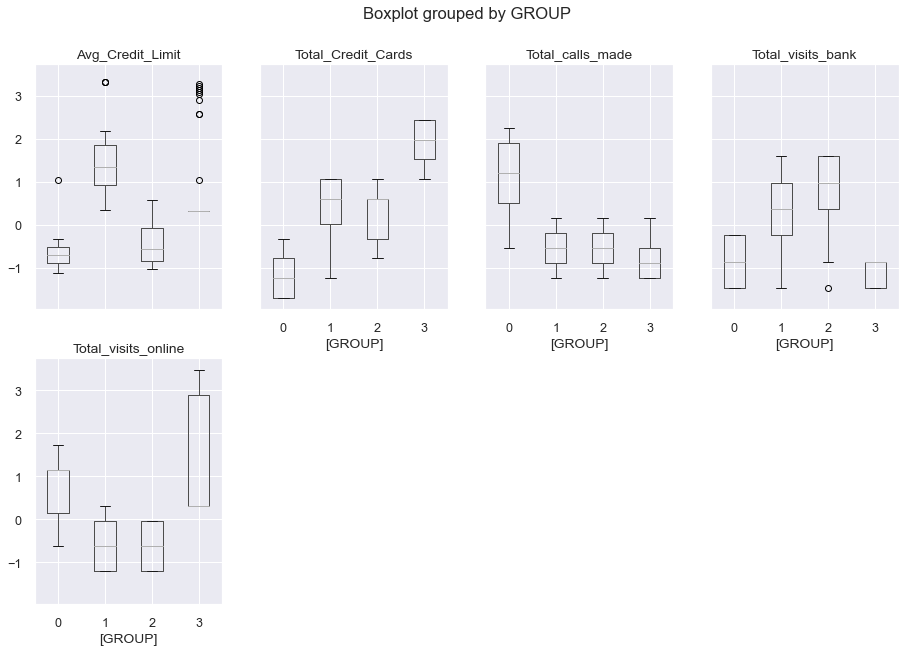

In [67]:
df1Scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Lets analyse the above boxplots
- In Avg Credit Limit group we see customers with average credit limit is above 50,000 who falls in Group 0 where there 
number of credit cards are 5 times and have been regular visitor of the banks.
- In Total Credit Cards Group we see there higher number of people who falls in Cluster 3. These customers hold the maximum
number of credit cards which is more than 8  and their credit limit is close to 20,000. These customers are less of value as they dont
seem to actively paticipating in online footprints of the bank. 
- In Total calls made group we see customers with avg credit limit of 12,000 with least number of credit cards make online visits for small bank transactions, small purchases and also engaged with telephone banking.

- The total visit bank group shows customers with 15,000 credit limit and 5 credit cards havew visited the bank maximum
times for various reasons.
- The last group is with customers who have similar number of habits of visiting the bank and same number of credit cards.

### Inference
Through K-Mean clustering we can infer that customers in cluster 0 and 2  can be targeted for upselling as they have higher number of credit cards and number of visits are maximum as well. 

To increase the quality of service from the back-end customer in cluster 1 should be targeted to improve the 
operations and support and they may tend to be extended with offers as their online visits are maximum as well.

## 5. Execute hierarchicalclustering(with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot

In [68]:
df2

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


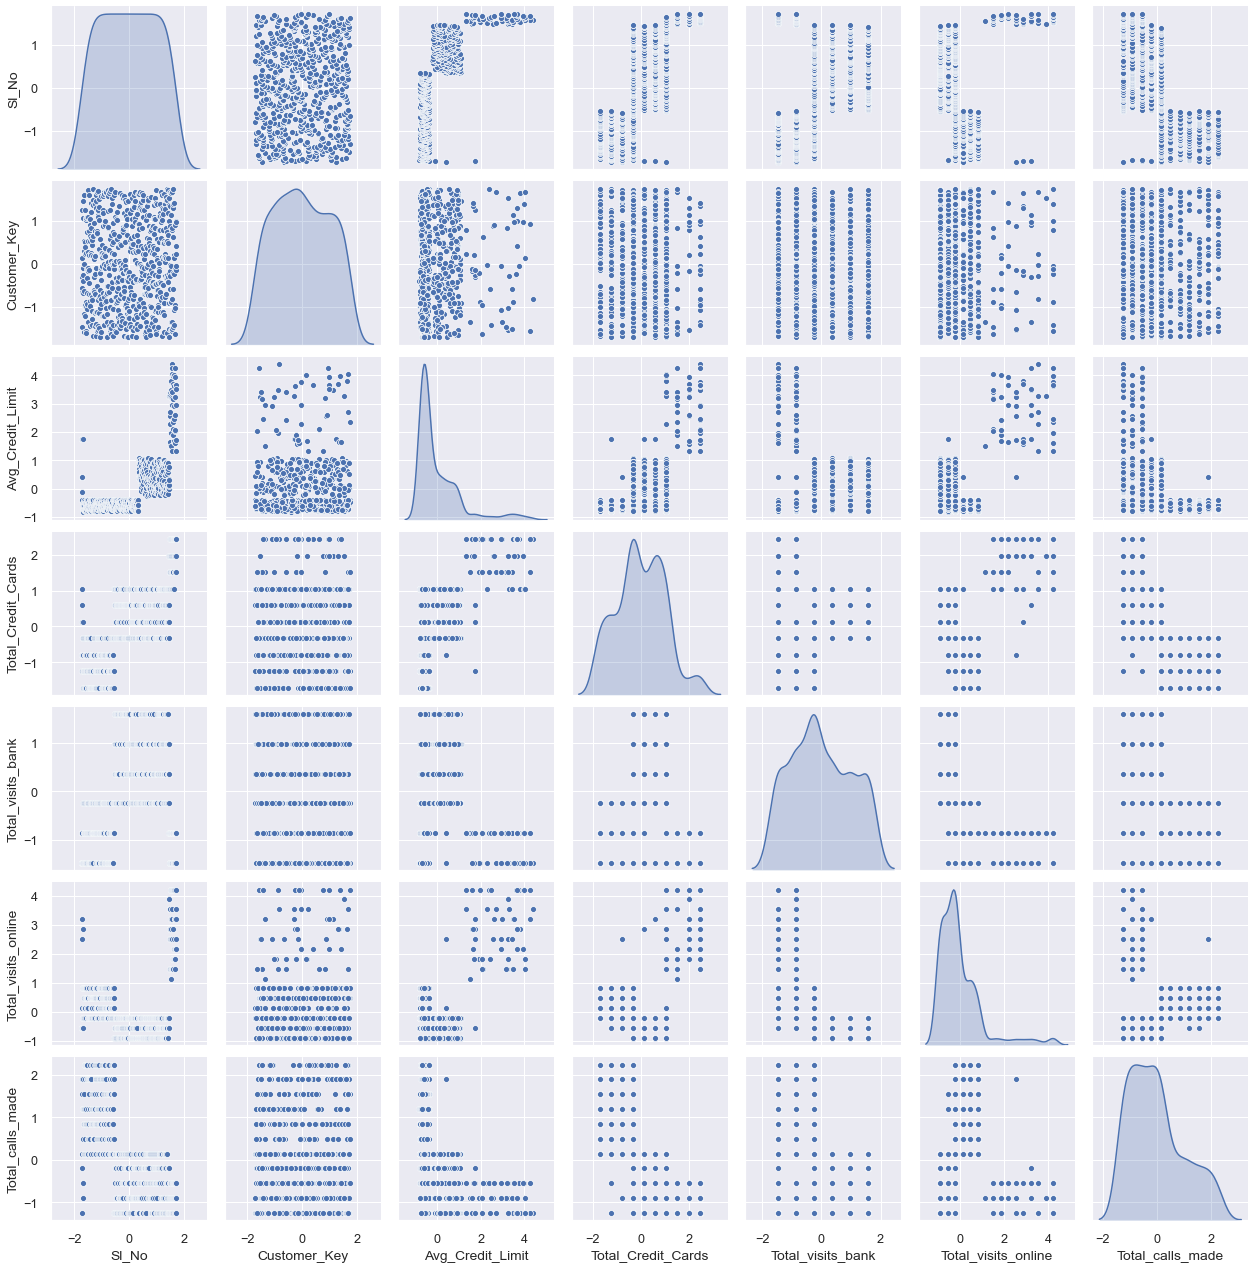

In [69]:
df2Attr=df2.iloc[:,0:]
df2Scaled=df2Attr.apply(zscore)
sns.pairplot(df2Scaled,diag_kind='kde')
#Lets replace each column with mean  = 0 and standard deviation = 1

BAsed on the above we'll take min clusters to be be 4 for the analysis

In [70]:
df2Attr

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [71]:
df2Scaled.head()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.729428,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-1.724180,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.718931,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-1.713683,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-1.708434,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [72]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [73]:
model.fit(df2Scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [74]:
#Dropping SI No and Customer Key as its not adding value to our analysis
df2 = df2.drop(['Sl_No','Customer_Key'], axis=1)

In [75]:
df2['labels'] = model.labels_
df2.head(10)

#df2.groupby(["labels"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,3
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2
5,20000,3,0,1,8,0
6,100000,5,0,11,2,2
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0


In [76]:
df2Clust = df2.groupby(['labels'])

In [77]:
df2Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,25685.855263,4.381579,2.557566,1.914474,3.786184
1,142750.000000,8.875000,0.625000,10.875000,1.020833
2,83333.333333,4.666667,0.000000,11.000000,4.666667
3,100000.000000,2.000000,1.000000,1.000000,0.000000


In [78]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df2Scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df2Scaled))

c

0.8795060897918682

We have used the linkage method as AVERAGE
C is correlation coefficient between the dendogramic distance which is ditance for every pair of points
distance between the pairs and the distance between two points meeting each other in the dendograp which is th ecorelation.

Higher the better. 

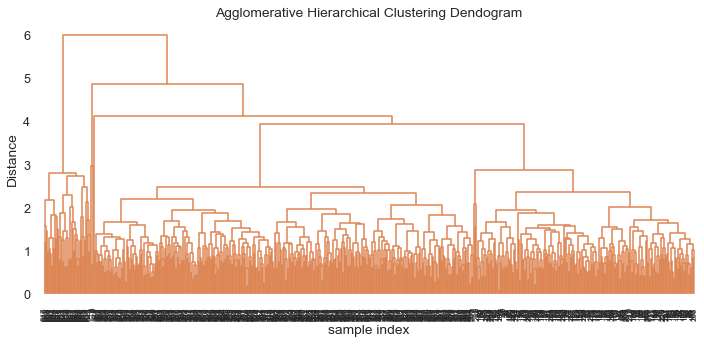

In [79]:
#Lets plot the dendogram for AVERAGE LINKAGE
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [80]:
#Now with COMPLETE Linkage
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df2Scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df2Scaled))

c

0.8568445411191499

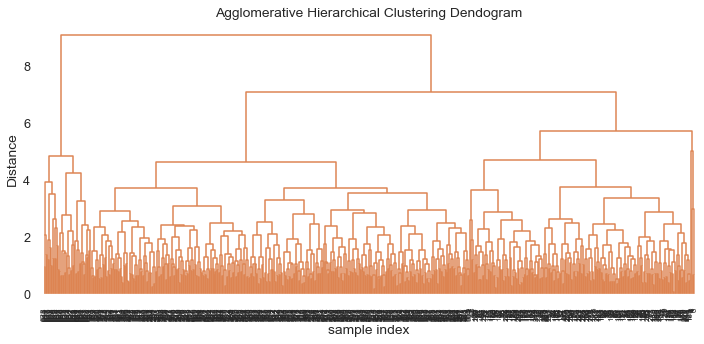

In [81]:
# Lets plot the dendogram for COMPLETE Linkage
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [82]:
#Now with WARD  Linkage
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df2Scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df2Scaled))

c

0.7221894654793625

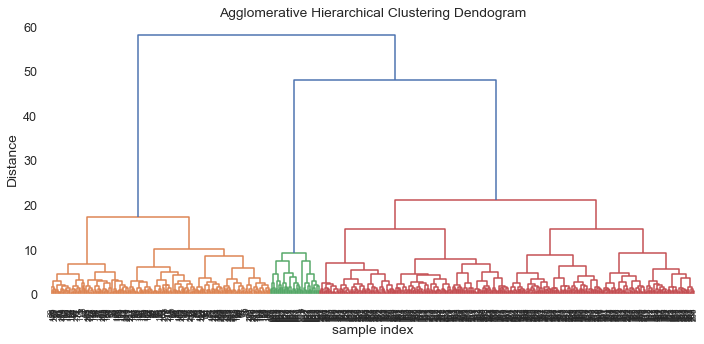

In [83]:
# Lets plot the dendogram for WARD Linkage
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [93]:
df3 = df3.drop(['Sl_No','Customer Key'], axis=1)

In [94]:
df3

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [95]:
x = df3

For n_clusters = 2 The average silhouette_score is : 0.770112135258687
For n_clusters = 3 The average silhouette_score is : 0.7187172255928896
For n_clusters = 4 The average silhouette_score is : 0.6987312610796789
For n_clusters = 5 The average silhouette_score is : 0.7085077086163358
For n_clusters = 6 The average silhouette_score is : 0.5994220977307592
For n_clusters = 7 The average silhouette_score is : 0.6223014220132757
For n_clusters = 8 The average silhouette_score is : 0.6164469466124994


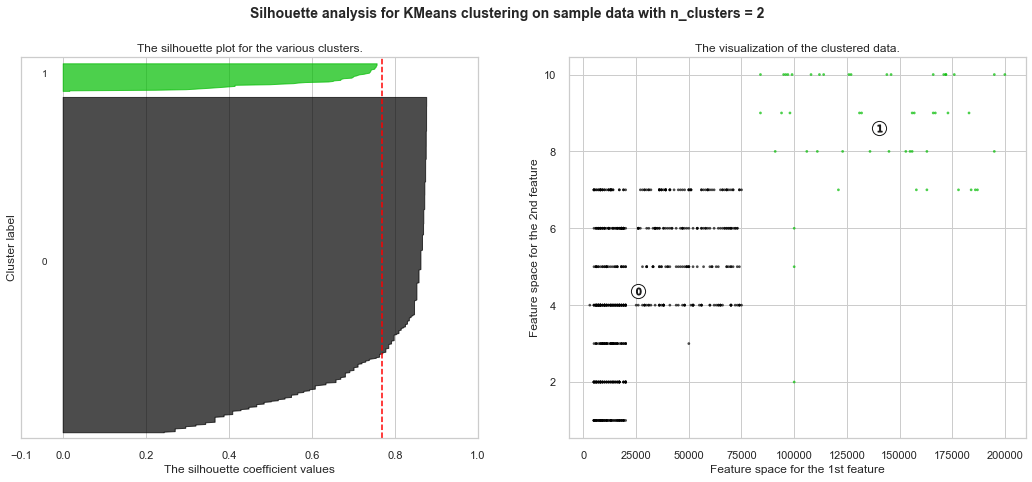

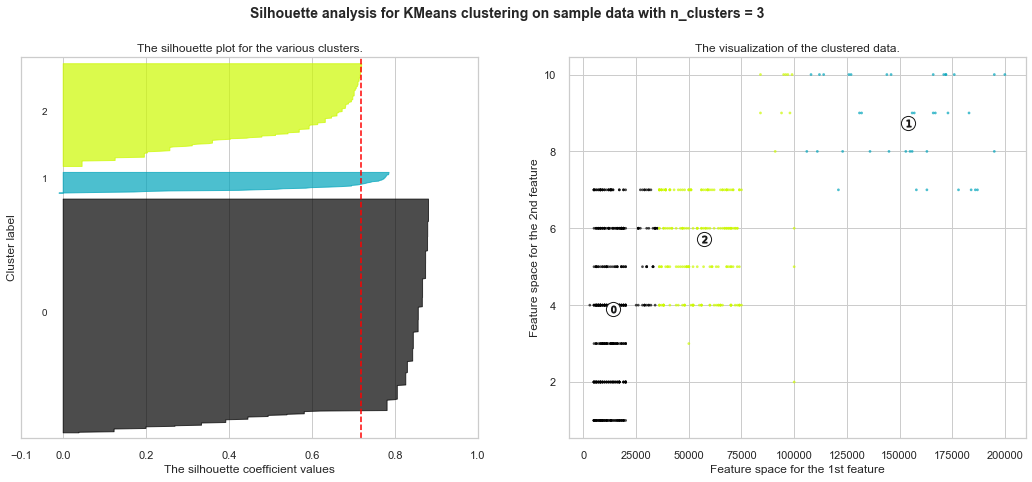

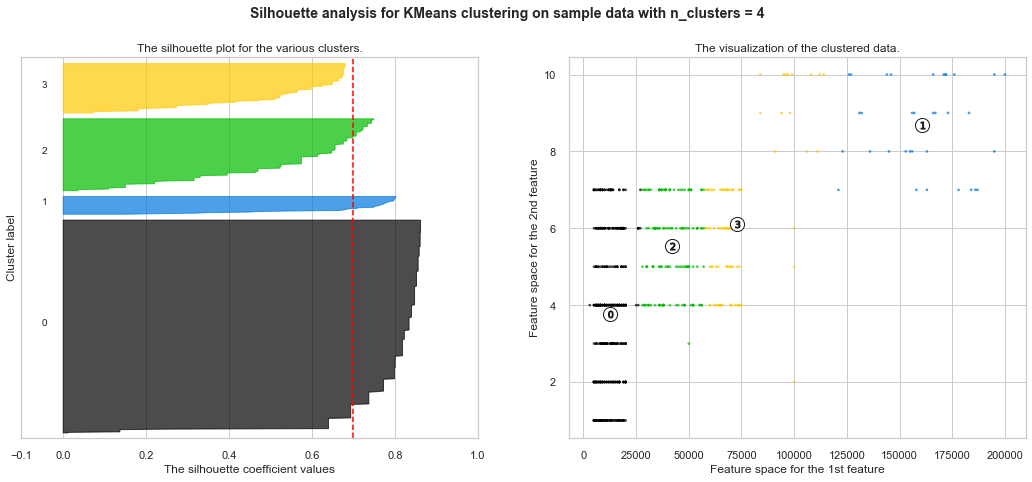

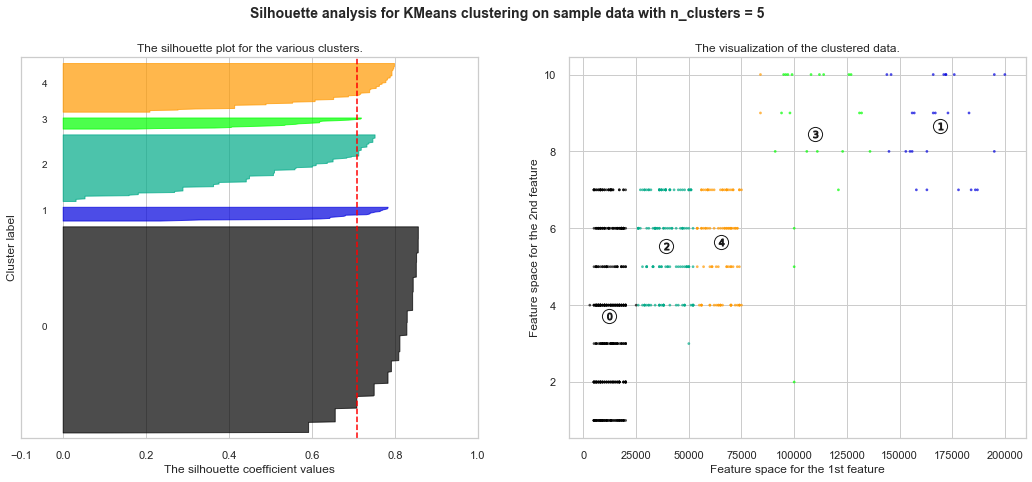

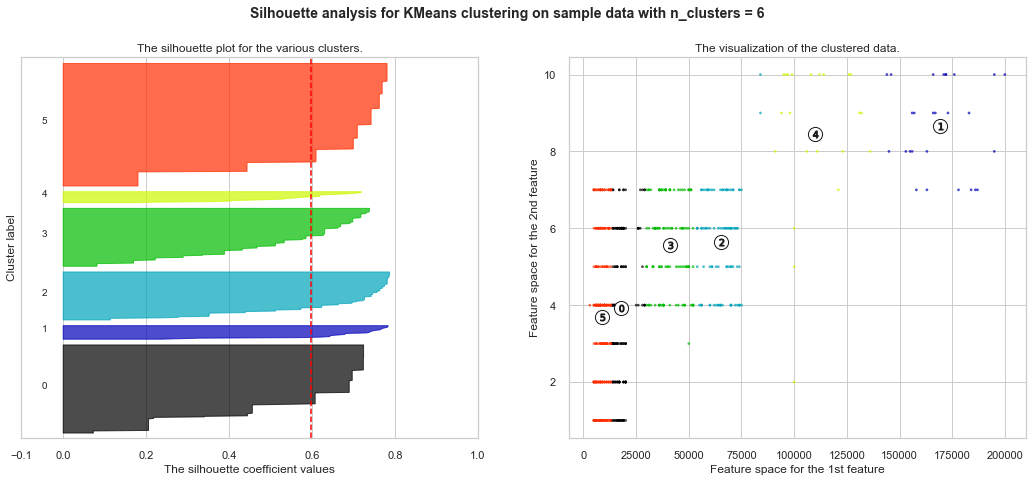

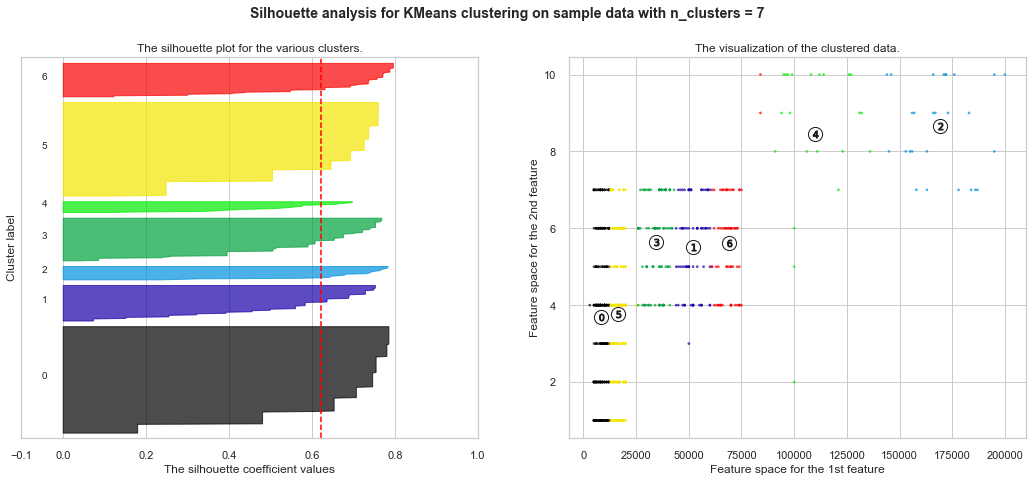

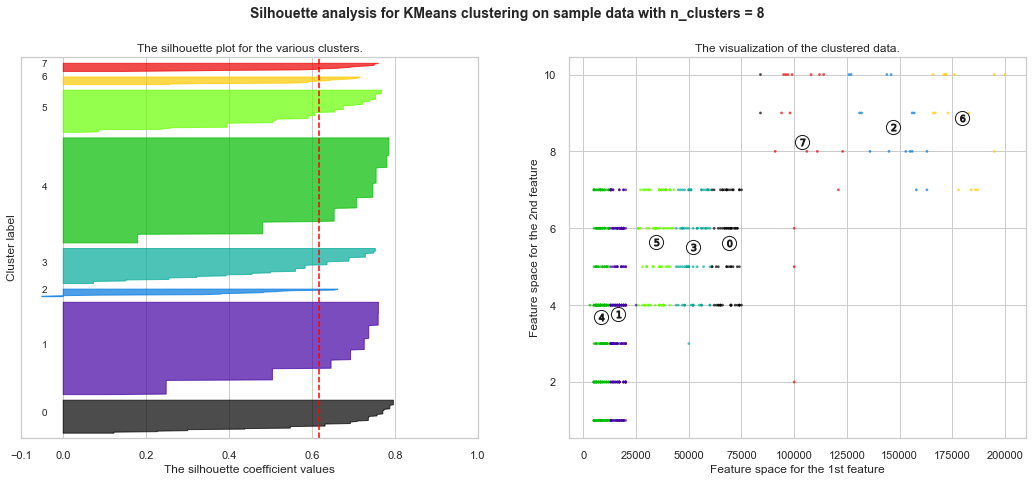

In [101]:
for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x.iloc[:, 0], x.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

With maximum average silhouette score of 77% , it best to suggest to select number of clusters as 2

### Calculate average Silhouette score for both methods. 

In [105]:
ac_cluster = AgglomerativeClustering(n_clusters=4,
                                    linkage='ward',
                                    affinity='euclidean')
cluster_labels = ac_cluster.fit_predict(df3)
silhouette_avg = silhouette_score(df3, cluster_labels)
silhouette_avg

#output was ;0.4093473569057454




0.6772390148190992

In [106]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=4,
                   random_state=7)
cluster_labels = clusterer.fit_predict(df3)
silhouette_avg = silhouette_score(df3, cluster_labels)
silhouette_avg

0.6987312610796789

 Here the Kmeans score looks good with 69%

### Compare K-Means Cluster with Hierarchical Cluster

In [118]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df3)

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.title('Clusters of Customers using K-Means Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful Customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard Customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target Customers')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless Customers')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible Customers')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Kmeans cluster shows better representation of how the customers can be grouped into 4 clusters.

Through K-Mean clustering we can infer that customers in cluster 0 and 2  can be targeted for upselling as they have higher number of credit cards and number of visits are maximum as well. 

To increase the quality of service from the back-end customer in cluster 1 should be targeted to improve the 
operations and support and they may tend to be extended with offers as their online visits are maximum as well.